# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16 - Takes a long time to train
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *
from efficientNet import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    
    # Rotate the images randomly (just to make it as independent from the position of the pipeline)
    transforms.RandomRotation(180),

    # Random crop
    #transforms.RandomCrop(140),

    #Random horizontal flip
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.Tensor
    transforms.ToTensor(),

    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 64
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 50
lr = 0.001
device = get_device()

mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")


loss_fn = nn.CrossEntropyLoss()

In [4]:
#Train MobileNet Large
name_save = "mobnet_lrg_64"
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS,name_save=name_save, device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Saving the model to: Models\mobnet_lrg_64_50_epc.pth
Epoch: 1 | train_loss: 0.7964 | train_acc: 0.6352 | validation_loss: 2.2319 | validation_acc: 0.2793
Saving the model to: Models\mobnet_lrg_64_50_epc.pth
Epoch: 2 | train_loss: 0.5258 | train_acc: 0.7555 | validation_loss: 5.3880 | validation_acc: 0.4121
Saving the model to: Models\mobnet_lrg_64_50_epc.pth
Epoch: 3 | train_loss: 0.5173 | train_acc: 0.7696 | validation_loss: 0.5794 | validation_acc: 0.6995
Saving the model to: Models\mobnet_lrg_64_50_epc.pth
Epoch: 4 | train_loss: 0.4037 | train_acc: 0.8125 | validation_loss: 0.4486 | validation_acc: 0.8176
Epoch: 5 | train_loss: 0.3836 | train_acc: 0.8284 | validation_loss: 1.1744 | validation_acc: 0.6330
Epoch: 6 | train_loss: 0.3627 | train_acc: 0.8378 | validation_loss: 0.6376 | validation_acc: 0.7915
Epoch: 7 | train_loss: 0.3657 | train_acc: 0.8405 | validation_loss: 0.6231 | validation_acc: 0.7088
Epoch: 8 | train_loss: 0.3618 | train_acc: 0.8373 | validation_loss: 2.2185 | val

In [5]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/8 [00:04<?, ?it/s]

In [6]:
eval_mobnet_lrg_results

{'model_name': 'MobileNetV3',
 'model_loss': 0.6803730726242065,
 'model_acc': 85.65204326923077,
 'model_inf_time': 70.25305223464966,
 'std_inf_time': 16.155228257524175}

In [ ]:
#Train MobileNet Small
name_save = "mobnet_lrg_64"
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS,name_save=name_save, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8579 | train_acc: 0.5950 | validation_loss: 0.9356 | validation_acc: 0.5945
Epoch: 2 | train_loss: 0.6457 | train_acc: 0.6975 | validation_loss: 0.5759 | validation_acc: 0.7520
Epoch: 3 | train_loss: 0.5974 | train_acc: 0.7105 | validation_loss: 0.7899 | validation_acc: 0.6125
Epoch: 4 | train_loss: 0.5358 | train_acc: 0.7522 | validation_loss: 0.6856 | validation_acc: 0.7371
Epoch: 5 | train_loss: 0.4988 | train_acc: 0.7638 | validation_loss: 0.6572 | validation_acc: 0.6789
Epoch: 6 | train_loss: 0.5262 | train_acc: 0.7712 | validation_loss: 0.4660 | validation_acc: 0.7723
Epoch: 7 | train_loss: 0.4709 | train_acc: 0.7830 | validation_loss: 0.6210 | validation_acc: 0.6730
Epoch: 8 | train_loss: 0.5083 | train_acc: 0.7855 | validation_loss: 0.5078 | validation_acc: 0.7805
Epoch: 9 | train_loss: 0.4496 | train_acc: 0.7880 | validation_loss: 0.5086 | validation_acc: 0.7645
Epoch: 10 | train_loss: 0.4243 | train_acc: 0.8033 | validation_loss: 0.6708 | validation_a

In [7]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\queues.py", line 239, in _feed
    reader_close()
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\connection.py", line 182, in close
    self._close()
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\connection.py", line 282, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\joaor\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\joaor\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times


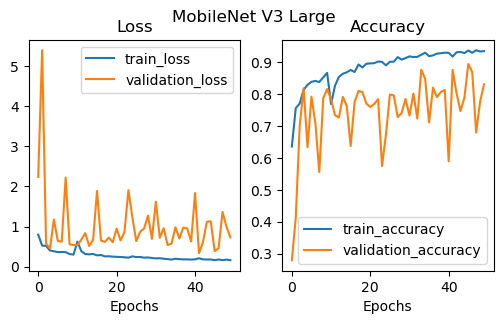

In [7]:
plot_loss_curves(train_mobnet_lrg_results,"MobileNet V3 Large") #, plot_loss_curves(train_mobnet_sml_results,"MobileNet V3 Small")

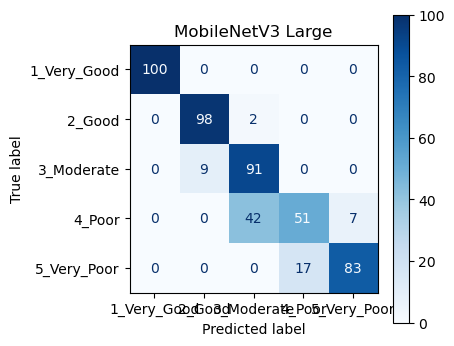

In [8]:
plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names, "MobileNetV3 Large") #, plot_confusion_matrix(mobnet_sml, test_dl, device, class_names, "MobileNetV3 Small")

In [ ]:
all_results = pd.DataFrame([
    eval_mobnet_sml_results,
    eval_mobnet_lrg_results,
    ])

In [ ]:
all_results['train_time'] = pd.DataFrame([
    train_time_mobnet_lrg,
    train_time_mobnet_sml,
])

In [ ]:
all_results

,model_name,model_loss,model_acc,model_inf_time,train_time
0,ResNet,0.766978,81.445312,24.068606,9092.867186
1,ResNet,1.017365,72.929688,52.475776,9879.035368
2,MobileNetV3,0.822920,83.710938,21.499968,9975.220580
3,MobileNetV3,0.542391,84.179688,31.142336,8363.080526


In [13]:
model_path = Path("Models/mobnet_sml_64_16_epc.pth")
loaded_model = MobileNetV3("large")
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.to(device)

Exception in thread Exception ignored in: <function _ConnectionBase.__del__ at 0x00000201F0AB3F70>
Traceback (most recent call last):
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\connection.py", line 137, in __del__
QueueFeederThread:
Traceback (most recent call last):
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\queues.py", line 239, in _feed
    self._close()
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\connection.py", line 282, in _close
    reader_close()
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\connection.py", line 182, in close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid
    self._close()
  File "c:\Users\joaor\anaconda3\lib\multiprocessing\connection.py", line 282, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\joaor\anaconda3\lib\threading.py", line 980, 

MobileNetV3(
  (conv): ConvBlock(
    (c): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): Hardswish()
  )
  (blocks): ModuleList(
    (0): BNeck(
      (block): Sequential(
        (0): ConvBlock(
          (c): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): ReLU()
        )
        (1): ConvBlock(
          (c): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): ReLU()
        )
        (2): Identity()
        (3): ConvBlock(
          (c): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [26]:
model_name_resnet18 = 'ResNet18_1000_class_100_epoch.pth'
model_name_resnet50 = 'ResNet50_1000_class_100_epoch.pth'
model_name_mobnet_lrg = 'Mobnet_lrg_1000_class_100_epoch.pth'
model_name_mobnet_sml = 'Mobnet_sml_1000_class_100_epoch.pth'
model_name_effnetb0 = 'EffNet_B0_1000_class_100_epoch.pth'
model_name_effnetb5 = 'EffNet_B5_1000_class_100_epoch.pth'

save_model(models_path, model_name_resnet18, resnet18)
save_model(models_path, model_name_resnet50, resnet50)
save_model(models_path, model_name_mobnet_lrg, mobnet_lrg)
save_model(models_path, model_name_mobnet_sml, mobnet_sml)
#save_model(models_path, model_name_effnetb0, effnetb0)
#save_model(models_path, model_name_effnetb5, effnetb5)

resnet18_all_results = [eval_resnet18_results, train_resnet18_results, train_time_resnet18]
resnet50_all_results = [eval_resnet50_results, train_resnet50_results, train_time_resnet50]
mobnet_lrg_all_results = [eval_mobnet_lrg_results, train_mobnet_lrg_results, train_time_mobnet_lrg]
mobnet_sml_all_results = [eval_mobnet_sml_results, train_mobnet_sml_results, train_time_mobnet_sml]
#effnetb0_all_results = [eval_effnetb0_results, train_effnetb0_results, train_time_effnetb0]
#effnetb5_all_results = [eval_effnetb5_results, train_effnetb5_results, train_time_effnetb5]

name_results_resnet18 = 'resnet18_results.npy'
name_results_resnet50 = 'resnet50_results.npy'
name_results_mobnet_lrg = 'mobnet_lrg_results.npy'
name_results_mobnet_sml = 'mobnet_sml_results.npy'
name_results_effnetb0 = 'effnetb0_results.npy'
name_results_effnetb5 = 'effnetb5_results.npy'

pth = saves / name_results_resnet18
np.save(pth,resnet18_all_results)

pth = saves / name_results_resnet50
np.save(pth,resnet50_all_results)

pth = saves / name_results_mobnet_lrg
np.save(pth,mobnet_lrg_all_results )

pth = saves / name_results_mobnet_sml
np.save(pth,mobnet_sml_all_results)

# pth = saves / name_results_effnetb0
# np.save(pth,effnetb0_all_results )

# pth = saves / name_results_effnetb5
# np.save(pth,effnetb5_all_results )

Saving the model to: Models\ResNet18_1000_class_100_epoch.pth
Saving the model to: Models\ResNet50_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_lrg_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_sml_1000_class_100_epoch.pth
